In [1]:
import pandas as pd
from nltk import tokenize

In [36]:
dataset = pd.read_csv('updated_dataset.csv')
dataset = dataset.fillna("")

In [5]:
all_tags = set()

for tags in dataset["tags"]:
    if type(tags) is not str:
        continue
    for tag in tags.lower().split("|"):
        all_tags.add(tag)

print(len(all_tags))

1666455


In [38]:
for row in dataset.itertuples():
    title = row.title.lower()
    description = row.description.lower()

    title_words = tokenize.word_tokenize(title)
    description_words = tokenize.word_tokenize(description)

    new_tags = set()

    for words in title_words:
        if words in all_tags:
            new_tags.add(words)

    for words in description_words:
        if words in all_tags:
            new_tags.add(words)

    if row.tags != "[None]":
        for given_tag in row.tags.lower().split("|"):
            new_tags.add(given_tag)

    dataset.at[row.Index, "tags"] = "|".join(new_tags)

In [39]:
dataset.to_csv("updated_dataset_tags.csv", index=False)

In [5]:
dataset = pd.read_csv("updated_dataset_tags.csv")

In [7]:
import pickle

with open("channel_subscribers.pkl", "rb") as f:
    channel_subscribers = pickle.load(f)

empty_channels = set()

for channel in channel_subscribers:
    if not channel_subscribers[channel]:
        empty_channels.add(channel)

# remove all videos from these channels from the dataset
dataset = dataset[~dataset["channelId"].isin(empty_channels)]

# add the subscribers for all the channels currently in the dataset for all the videos by adding a new column called subscribers
subscribers = []
for row in dataset.itertuples():
    subscribers.append(channel_subscribers[row.channelId])

dataset["subscribers"] = subscribers

C:\Users\Manan\AppData\Local\Temp\ipykernel_3928\4003750256.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["subscribers"] = subscribers


In [10]:
dataset.to_csv("updated_dataset_tags_subscribers.csv", index=False)

In [ ]:
dataset = pd.read_csv("updated_dataset_tags_subscribers.csv")

In [7]:
tag_counts = {tag: 0 for tag in all_tags}
tag_counts_subscribers = {tag: 0 for tag in all_tags}
tag_counts_views = {tag: 0 for tag in all_tags}

for row in dataset.itertuples():
    if type(row.tags) is not str:
        continue
    for tag in row.tags.split("|"):
        tag_counts[tag] += 1
        # tag_counts_subscribers[tag] += row.subscribers
        tag_counts_views[tag] += row.view_count

In [8]:
len(set(dataset["channelId"]))

43417

In [13]:
d = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:100]
for i in d:
    if len(i[0]) > 3:
        print(i)

('instagram', 112282)
('video', 74860)
('twitter', 68864)
('facebook', 67961)
('with', 62701)
('youtube', 62583)
('subscribe', 52088)
('this', 51302)
('channel', 48608)
('from', 44931)
('music', 44771)
('more', 42111)
('канал', 37511)
('like', 36447)
('here', 36444)
('your', 36029)
('videos', 35077)
('tiktok', 34444)
('live', 31347)
('follow', 31284)
('official', 31259)
('watch', 30903)
('that', 30556)
('видео', 25268)
('will', 24625)
('pour', 24436)
('shorts', 23213)
('para', 22707)
('canal', 22671)
('news', 21856)
('about', 20937)
('media', 20744)


In [15]:
d = sorted(tag_counts_views.items(), key=lambda x: x[1], reverse=True)[:500]
for i in d:
    if len(i[0]) > 3:
        print(i)

('video', 789543623528)
('instagram', 610364541820)
('music', 602467547270)
('with', 482995843415)
('official', 429778162756)
('subscribe', 406346305121)
('youtube', 398823999892)
('facebook', 395948595040)
('this', 390732439813)
('shorts', 375494566665)
('twitter', 358126210480)
('your', 331031434490)
('from', 293365126990)
('channel', 286831851100)
('like', 283279770012)
('follow', 278531843377)
('more', 245766249471)
('here', 239135603059)
('tiktok', 232006644871)
('videos', 228701927356)
('that', 220924868998)
('song', 206495103570)
('entertainment', 203449023576)
('director', 188853985012)
('will', 181756182185)
('producer', 179586037963)
('love', 178390268852)
('production', 167315436153)
('watch', 161202437792)
('2021', 155299553966)
('make', 149851827758)
('oficial', 143628823474)
('lyrics', 139035643236)
('spotify', 135037292261)
('full', 133431830144)
('canal', 132567340585)
('funny', 131164333896)
('about', 125630458562)
('team', 125298025653)
('please', 124277780904)
('2022

In [11]:
# Select the specified columns to create the complete_dataset
complete_dataset = dataset[['categoryId', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'region', 'duration', 'definition', 'caption', 'comment_sentiment']]

# Display the first few rows of the new DataFrame
print(complete_dataset.head())

   categoryId                                               tags  view_count  \
0          22  my|girlfriend|vlogs|...|prank|skits|to|brawadi...     4495886   
1          20  free|aka|good|new apex legend|but|stories|and|...     5764921   
2          24  spicy memes|meme|community subreddit|reaction|...     4163436   
3          10  1st|2020 xxl freshman|wave|xxl|fivio|website|x...     1748453   
4          26  video|jam|custom|follow|lux|dramatic|empty|tab...     2873202   

    likes  dislikes  comment_count  comments_disabled region  duration  \
0  212931      5855          40187              False     US      1118   
1  200844      2794          16500              False     US       138   
2  478551      2628          42857              False     US      1330   
3   42464      1856           9512              False     US        61   
4   73118       964           2744              False     US      2240   

  definition  caption  comment_sentiment  
0         hd    False          

In [12]:
# List of tags to apply one-hot encoding
tags_to_encode = [
    'instagram', 'video', 'twitter', 'facebook', 'youtube', 'subscribe', 'channel', 
    'music', 'tiktok', 'live', 'official', 'shorts', 'news', 'media', 'about', 
    'song', 'entertainment', 'director', 'producer', 'love', 'production', 
    'spotify', 'funny', 'design', 'download', 'merch', 'family', 'challenge', 'comedy', 'digital'
]

# Initialize columns for one-hot encoding
for tag in tags_to_encode:
    complete_dataset.loc[:, f"tag_{tag}"] = complete_dataset['tags'].apply(lambda x: 1 if type(x) == str and tag in x.split('|') else 0)

# Remove the original 'tags' column
complete_dataset.drop(columns=['tags'], inplace=True)

# Display the first few rows of the updated DataFrame
print(complete_dataset.head())

C:\Users\Manan\AppData\Local\Temp\ipykernel_3928\1585907410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_dataset.loc[:, f"tag_{tag}"] = complete_dataset['tags'].apply(lambda x: 1 if type(x) == str and tag in x.split('|') else 0)
C:\Users\Manan\AppData\Local\Temp\ipykernel_3928\1585907410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_dataset.loc[:, f"tag_{tag}"] = complete_dataset['tags'].apply(lambda x: 1 if type(x) == str and tag in x.split('|') else 0)
C:\Users\Manan\AppDa

   categoryId  view_count   likes  dislikes  comment_count  comments_disabled  \
0          22     4495886  212931      5855          40187              False   
1          20     5764921  200844      2794          16500              False   
2          24     4163436  478551      2628          42857              False   
3          10     1748453   42464      1856           9512              False   
4          26     2873202   73118       964           2744              False   

  region  duration definition  caption  ...  tag_production  tag_spotify  \
0     US      1118         hd    False  ...               0            0   
1     US       138         hd     True  ...               0            0   
2     US      1330         hd    False  ...               0            0   
3     US        61         hd    False  ...               0            0   
4     US      2240         hd    False  ...               0            0   

   tag_funny  tag_design  tag_download  tag_merch  tag_f

In [13]:
complete_dataset.to_csv("complete_dataset.csv", index=False)

<h3 align='center'>EDA</h3>

In [6]:
import pandas as pd
complete_dataset = pd.read_csv("complete_dataset.csv")
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450731 entries, 0 to 450730
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   categoryId         450731 non-null  int64  
 1   view_count         450731 non-null  int64  
 2   likes              450731 non-null  int64  
 3   dislikes           450731 non-null  int64  
 4   comment_count      450731 non-null  int64  
 5   comments_disabled  450731 non-null  bool   
 6   region             450731 non-null  object 
 7   duration           450731 non-null  int64  
 8   definition         450731 non-null  object 
 9   caption            450731 non-null  bool   
 10  comment_sentiment  450731 non-null  float64
 11  subscribers        450731 non-null  int64  
 12  tag_instagram      450731 non-null  int64  
 13  tag_video          450731 non-null  int64  
 14  tag_twitter        450731 non-null  int64  
 15  tag_facebook       450731 non-null  int64  
 16  ta

In [4]:
complete_dataset.isnull().sum()

categoryId           0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
region               0
duration             0
definition           0
caption              0
comment_sentiment    0
tag_instagram        0
tag_video            0
tag_twitter          0
tag_facebook         0
tag_youtube          0
tag_subscribe        0
tag_channel          0
tag_music            0
tag_tiktok           0
tag_live             0
tag_official         0
tag_shorts           0
tag_news             0
tag_media            0
tag_about            0
tag_song             0
tag_entertainment    0
tag_director         0
tag_producer         0
tag_love             0
tag_production       0
tag_spotify          0
tag_funny            0
tag_design           0
tag_download         0
tag_merch            0
tag_family           0
tag_challenge        0
tag_comedy           0
tag_digital          0
dtype: int64

It can be observed that there are no null values in the dataset.

In [8]:
complete_dataset.describe()

,categoryId,view_count,likes,dislikes,comment_count,region,duration,definition,comment_sentiment,tag_instagram,...,tag_production,tag_spotify,tag_funny,tag_design,tag_download,tag_merch,tag_family,tag_challenge,tag_comedy,tag_digital
count,450731.000000,4.507310e+05,4.507310e+05,4.507310e+05,4.507310e+05,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000,...,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000,450731.000000
mean,19.734764,5.016213e+06,1.256398e+05,3.502586e+02,4.035947e+03,5.877983,1294.606863,0.004486,0.155686,0.248736,...,0.027835,0.021656,0.031402,0.017649,0.029827,0.024602,0.033035,0.027074,0.034535,0.018956
std,6.551173,2.379317e+07,5.177033e+05,6.478964e+03,3.784381e+04,3.114976,3017.209399,0.066828,0.193607,0.432281,...,0.164499,0.145558,0.174403,0.131673,0.170110,0.154910,0.178729,0.162299,0.182599,0.136369
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.911910,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,3.951655e+05,1.039700e+04,0.000000e+00,4.420000e+02,3.000000,220.000000,0.000000,0.001735,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,1.057772e+06,2.823200e+04,0.000000e+00,1.150000e+03,6.000000,668.000000,0.000000,0.122740,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,2.940004e+06,8.188250e+04,1.500000e+02,2.958000e+03,9.000000,1225.000000,0.000000,0.270210,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.000000,3.487457e+09,5.196805e+07,3.979409e+06,1.580316e+07,10.000000,86182.000000,1.000000,0.999970,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A skewed distribution is seen in views, likes, dislikes, and comment counts, indicating that some videos receive exceptionally high engagement and extreme reactions, reflecting their viral nature.

<Figure size 1800x1200 with 0 Axes>

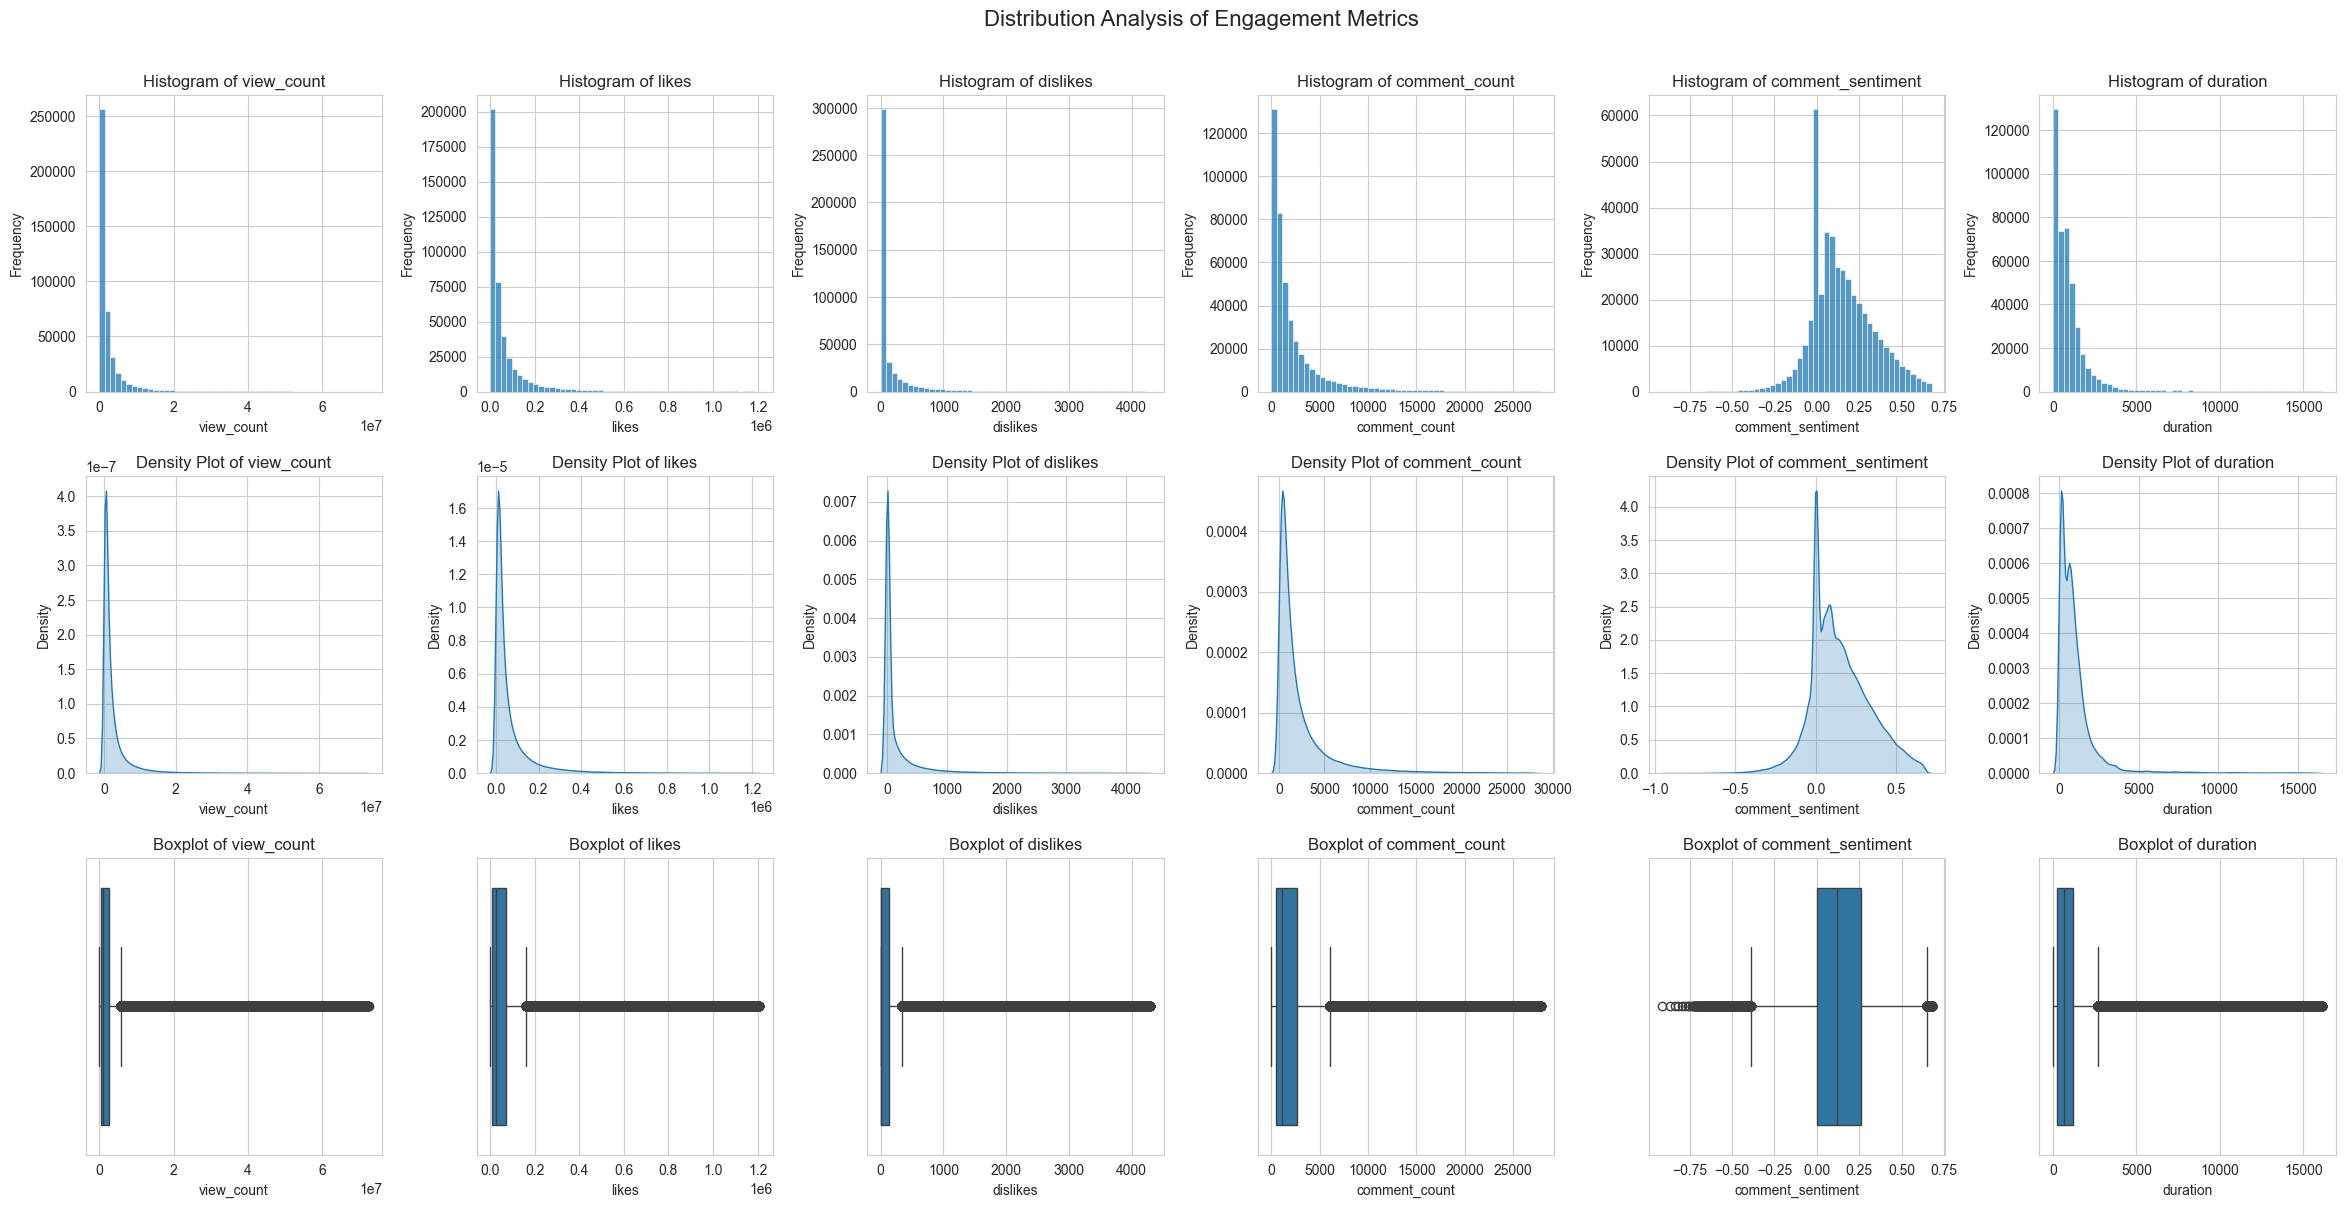

In [2]:
# Distribution Analysis of Engagement Metrics

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")

columns_to_analyze = ['view_count', 'likes', 'dislikes', 'comment_count', 'comment_sentiment', 'duration']

# remove outliers
for column in columns_to_analyze:
    complete_dataset_normalized = complete_dataset[complete_dataset[column] < complete_dataset[column].quantile(0.99)]

fig, axes = plt.subplots(3, 6, figsize=(24, 12))  
fig.tight_layout(pad=4.0) 

for i, column in enumerate(columns_to_analyze):
    # Histogram
    sns.histplot(complete_dataset_normalized[column], bins=50, kde=False, ax=axes[0, i])
    axes[0, i].set_title(f'Histogram of {column}')
    axes[0, i].set_xlabel(column)
    axes[0, i].set_ylabel('Frequency')

    # Density Plot (KDE)
    sns.kdeplot(complete_dataset_normalized[column], fill=True, ax=axes[1, i])
    axes[1, i].set_title(f'Density Plot of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=complete_dataset_normalized[column], ax=axes[2, i])
    axes[2, i].set_title(f'Boxplot of {column}')
    axes[2, i].set_xlabel(column)

plt.suptitle('Distribution Analysis of Engagement Metrics', fontsize=16, y=1.02)
plt.show()


The histograms, KDE density plots, and box plots similarly reveal that all the metrics exhibit significant skewness, indicating the presence of extreme values. <br>
However, “comment_sentiment” stands out with a more balanced distribution, leaning slightly towards the positive side, suggesting a generally favorable sentiment across video comments.

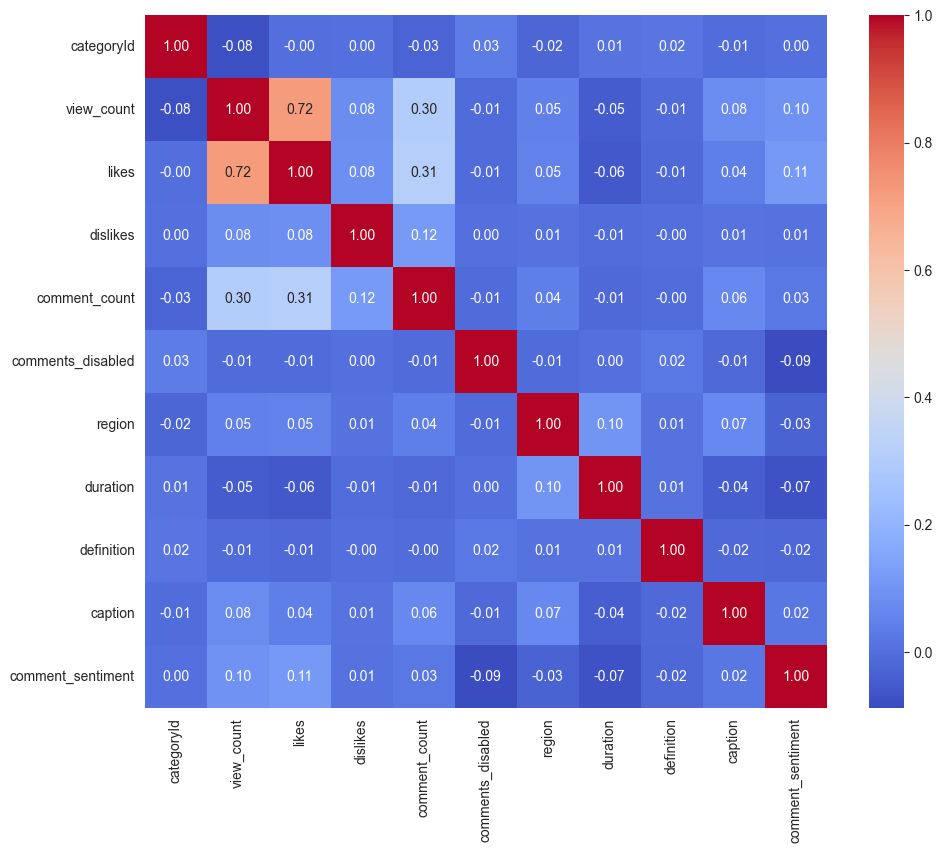

In [10]:
# Correlational Analysis

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# label encode categorical columns
label_encoders = {}
for column in complete_dataset.columns:
    if complete_dataset[column].dtype == 'object':
        label_encoder = LabelEncoder()
        complete_dataset[column] = label_encoder.fit_transform(complete_dataset[column])
        label_encoders[column] = label_encoder

# Creating a correlation matrix of the first 11 columns of the dataset
corr = complete_dataset.iloc[:, :11].corr()
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.show()



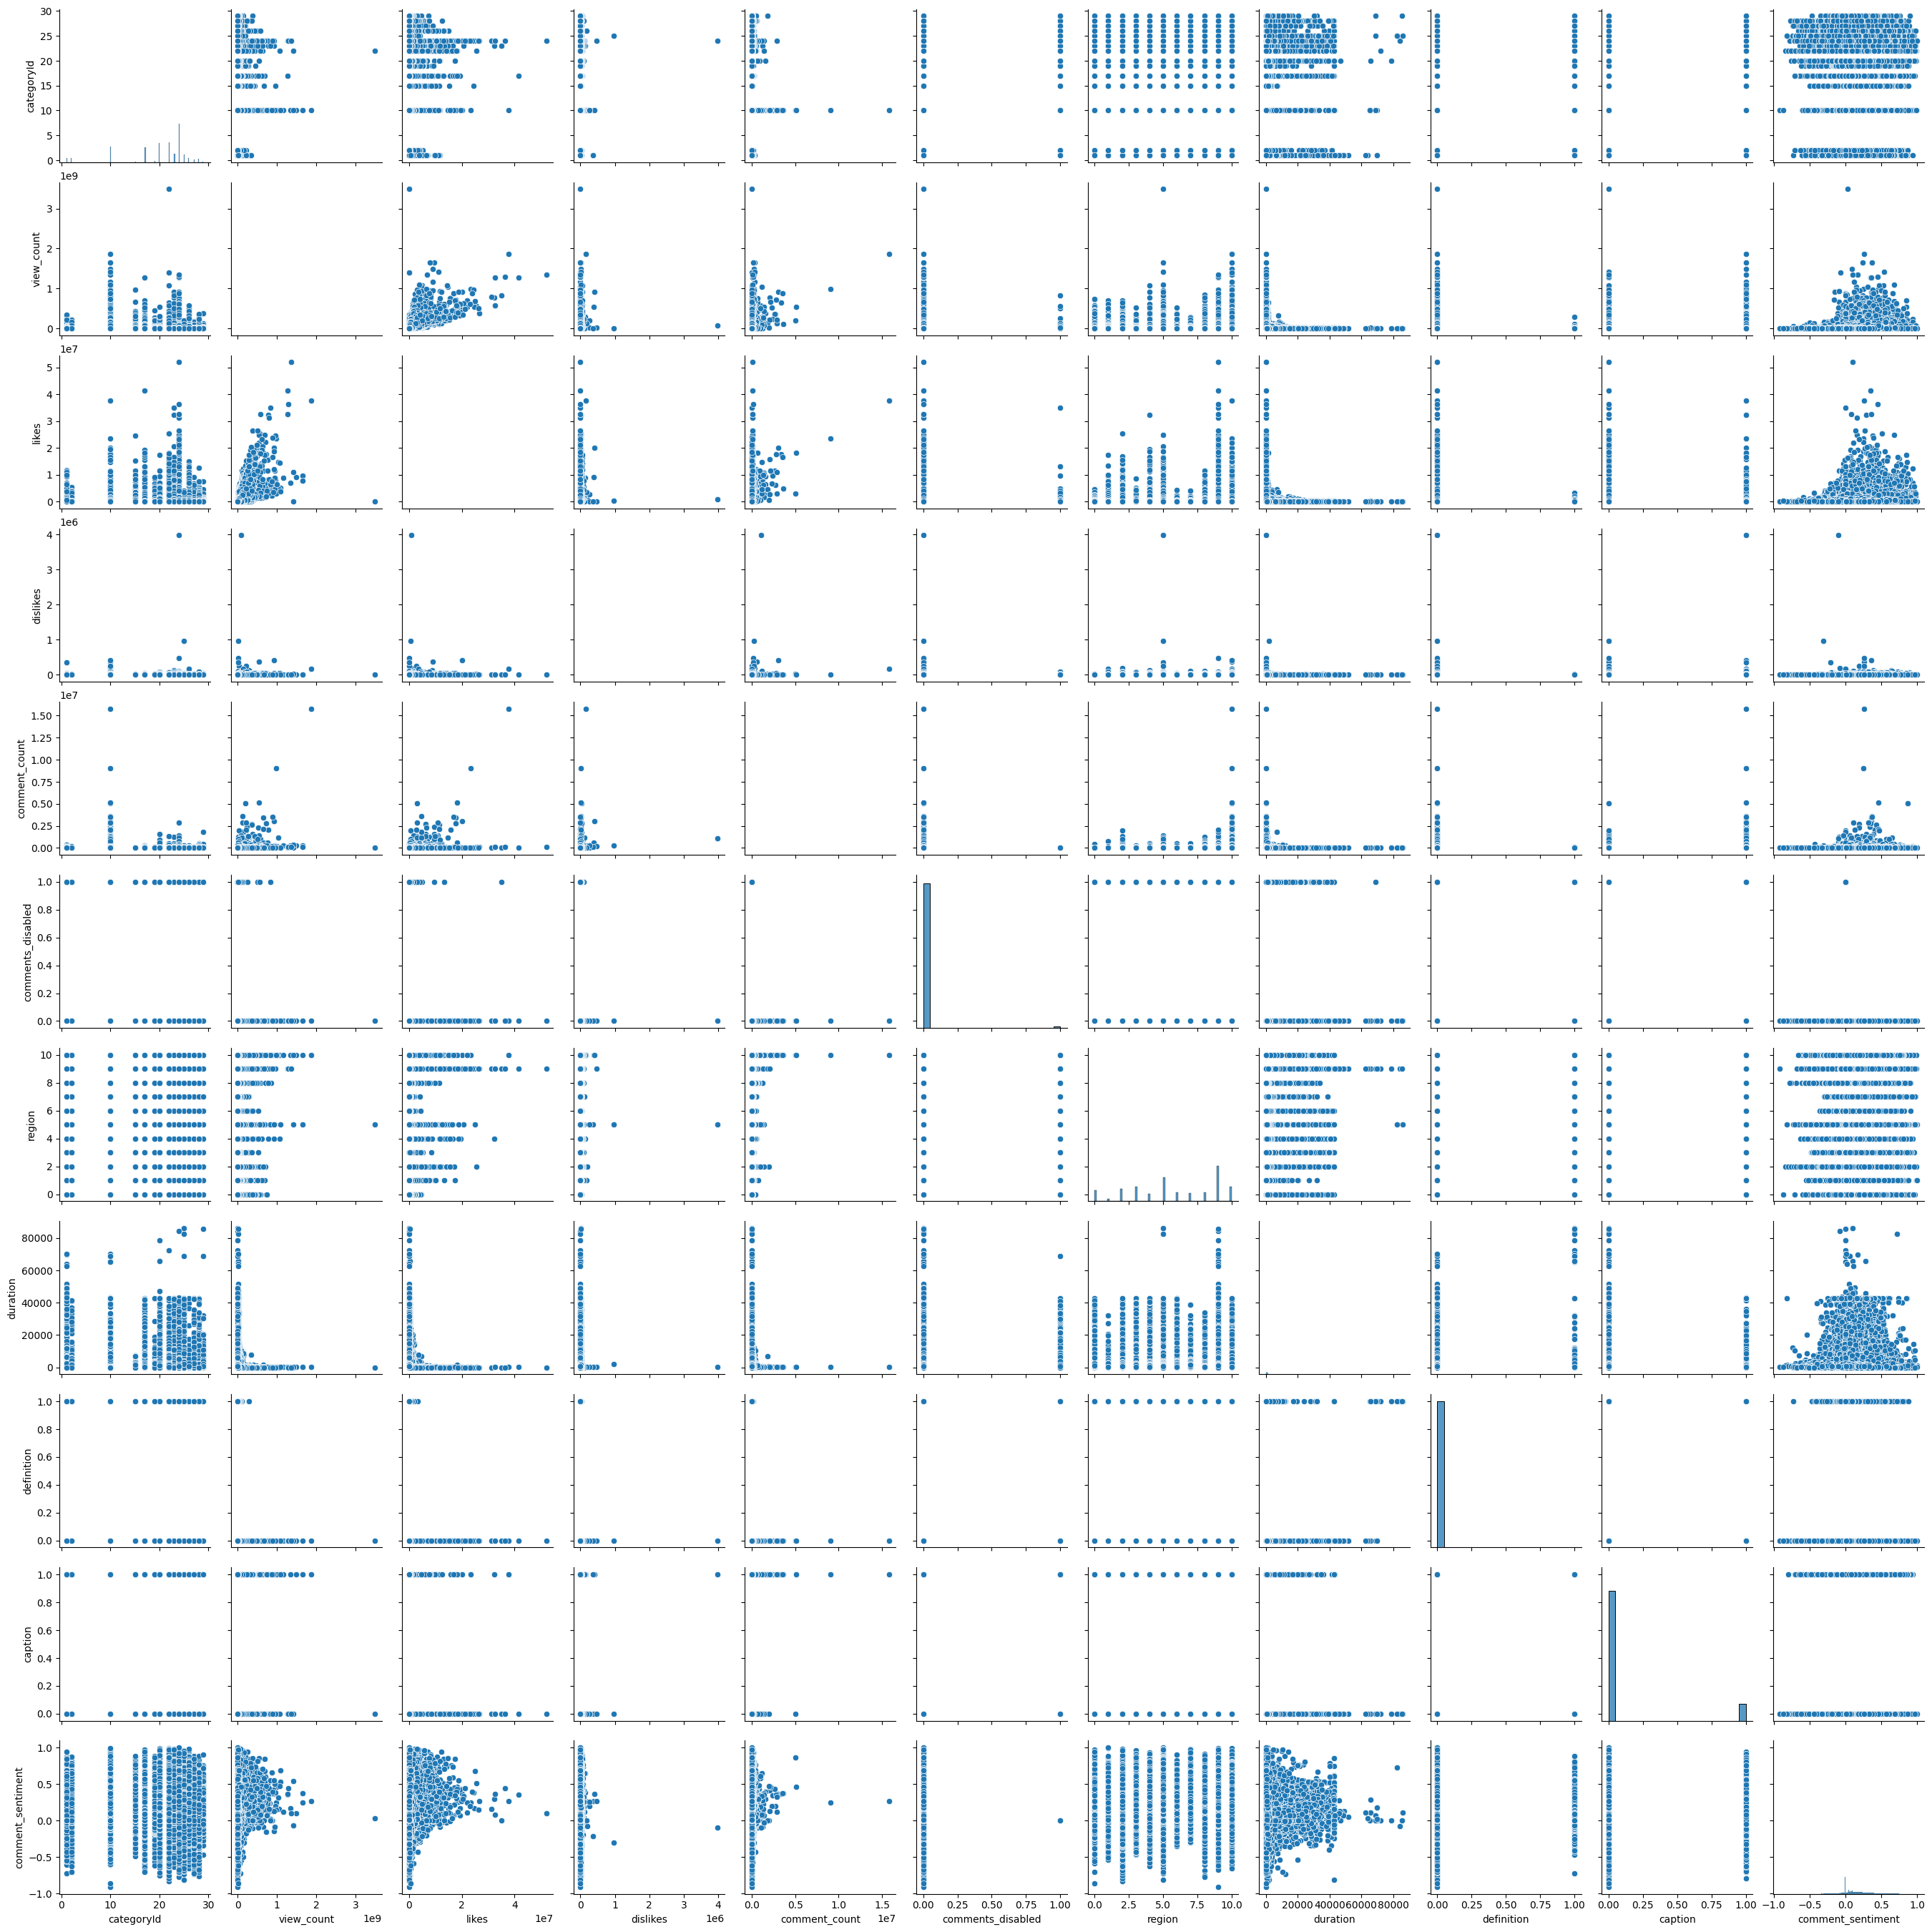

In [22]:
# pair plots of first 11 columns (numerical features)
sns.pairplot(complete_dataset.iloc[:, :11])
plt.show()

Insights from heatmap & pair plots :-
1. Views & Likes (0.72) shows that videos with higher view counts tend to receive more likes, showing positive engagement. Also, Views & Comments (0.30) and Likes & Comments (0.31) shows that popular videos attract more comments. 
2. Duration - Negligible correlations across metrics, indicating video length doesn’t strongly impact engagement. Also, negative correlation with view_count may tell something about our decreased attention span.
3. Caption - Minimal influence on other metrics, suggesting captions are not strongly tied to engagement.

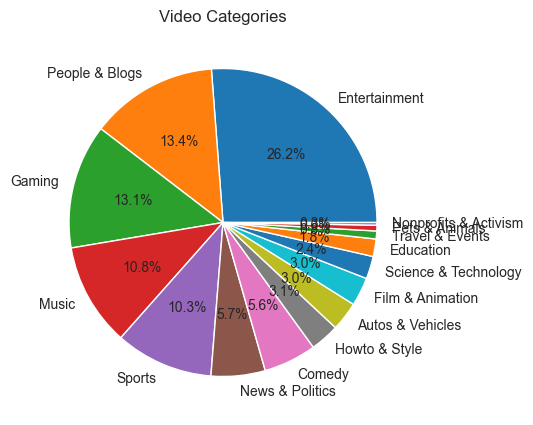

In [10]:
# Categorical Analysis

category_mapping = {
    2: "Autos & Vehicles",
    1: "Film & Animation",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

# make pie chart according to definition
definition_counts = complete_dataset['categoryId'].value_counts()
labels = [category_mapping.get(cat_id, "Unknown") for cat_id in definition_counts.index]
plt.figure(figsize=(10, 5))
plt.pie(definition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Video Categories')
plt.show()


Entertainment videos are the most popular (26.2%), indicating they drive a large portion of engagement.
Categories like People & Blogs (13.4%), Gaming (13.1%), and Music (10.8%) also have significant shares, reflecting varied audience preferences.

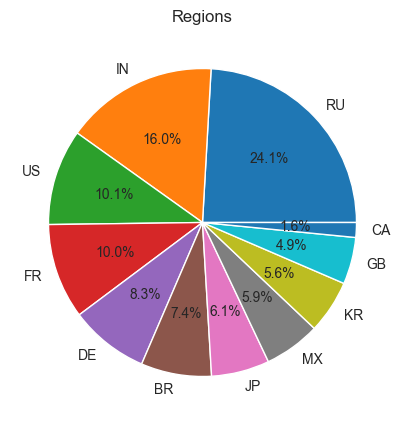

In [13]:
# pie chart for region
region_counts = complete_dataset['region'].value_counts()
regions = [label_encoders['region'].inverse_transform([region])[0] for region in region_counts.index]
plt.figure(figsize=(10, 5))
plt.pie(region_counts, labels=regions, autopct='%1.1f%%')
plt.title('Regions')
plt.show()


Russia (24.1%) and India (16.0%) dominate video engagements, suggesting high viewership or content production from these regions.
US, France, and Germany, together, account for about 28.4%, indicating significant activity from Western countries.

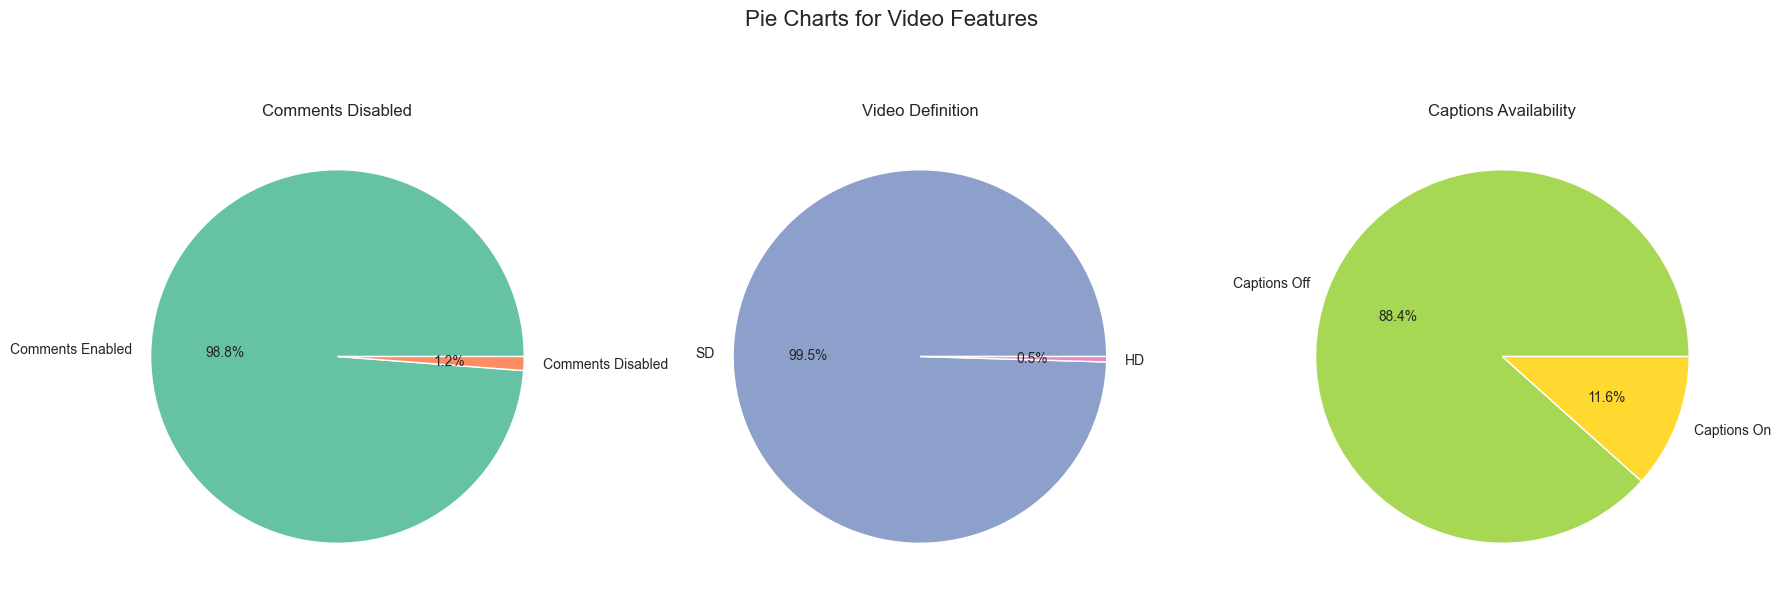

In [15]:
comments_disabled_counts = complete_dataset['comments_disabled'].value_counts()
definition_counts = complete_dataset['definition'].value_counts()
caption_counts = complete_dataset['caption'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for comments_disabled
axes[0].pie(comments_disabled_counts, labels=['Comments Enabled', 'Comments Disabled'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
axes[0].set_title('Comments Disabled')

# Pie chart for definition
axes[1].pie(definition_counts, labels=['SD', 'HD'], autopct='%1.1f%%', colors=['#8da0cb', '#e78ac3'])
axes[1].set_title('Video Definition')

# Pie chart for captions
axes[2].pie(caption_counts, labels=['Captions Off', 'Captions On'], autopct='%1.1f%%', colors=['#a6d854', '#ffd92f'])
axes[2].set_title('Captions Availability')

plt.suptitle('Pie Charts for Video Features', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


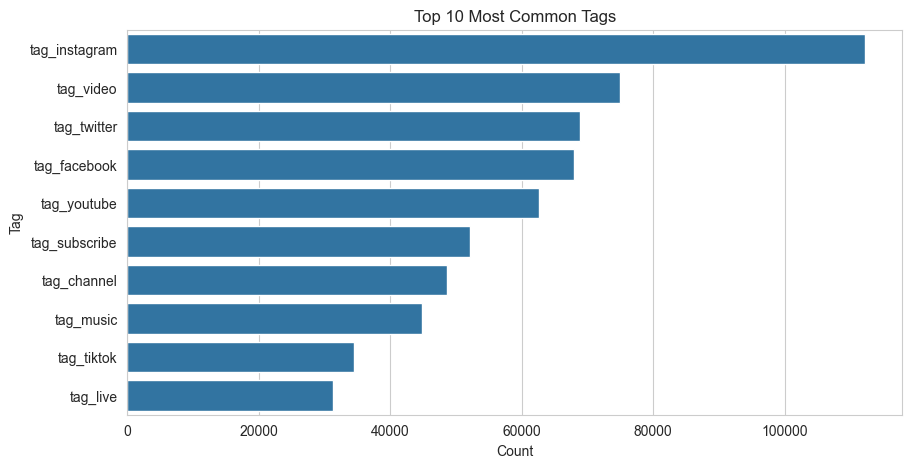

In [16]:
# Tags Analysis

tag_counts = complete_dataset.iloc[:, 11:].sum(axis=0)
tag_counts = tag_counts.sort_values(ascending=False)

# Plot the top 10 most common tags
plt.figure(figsize=(10, 5))
sns.barplot(x=tag_counts.values[:10], y=tag_counts.index[:10])
plt.title('Top 10 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()


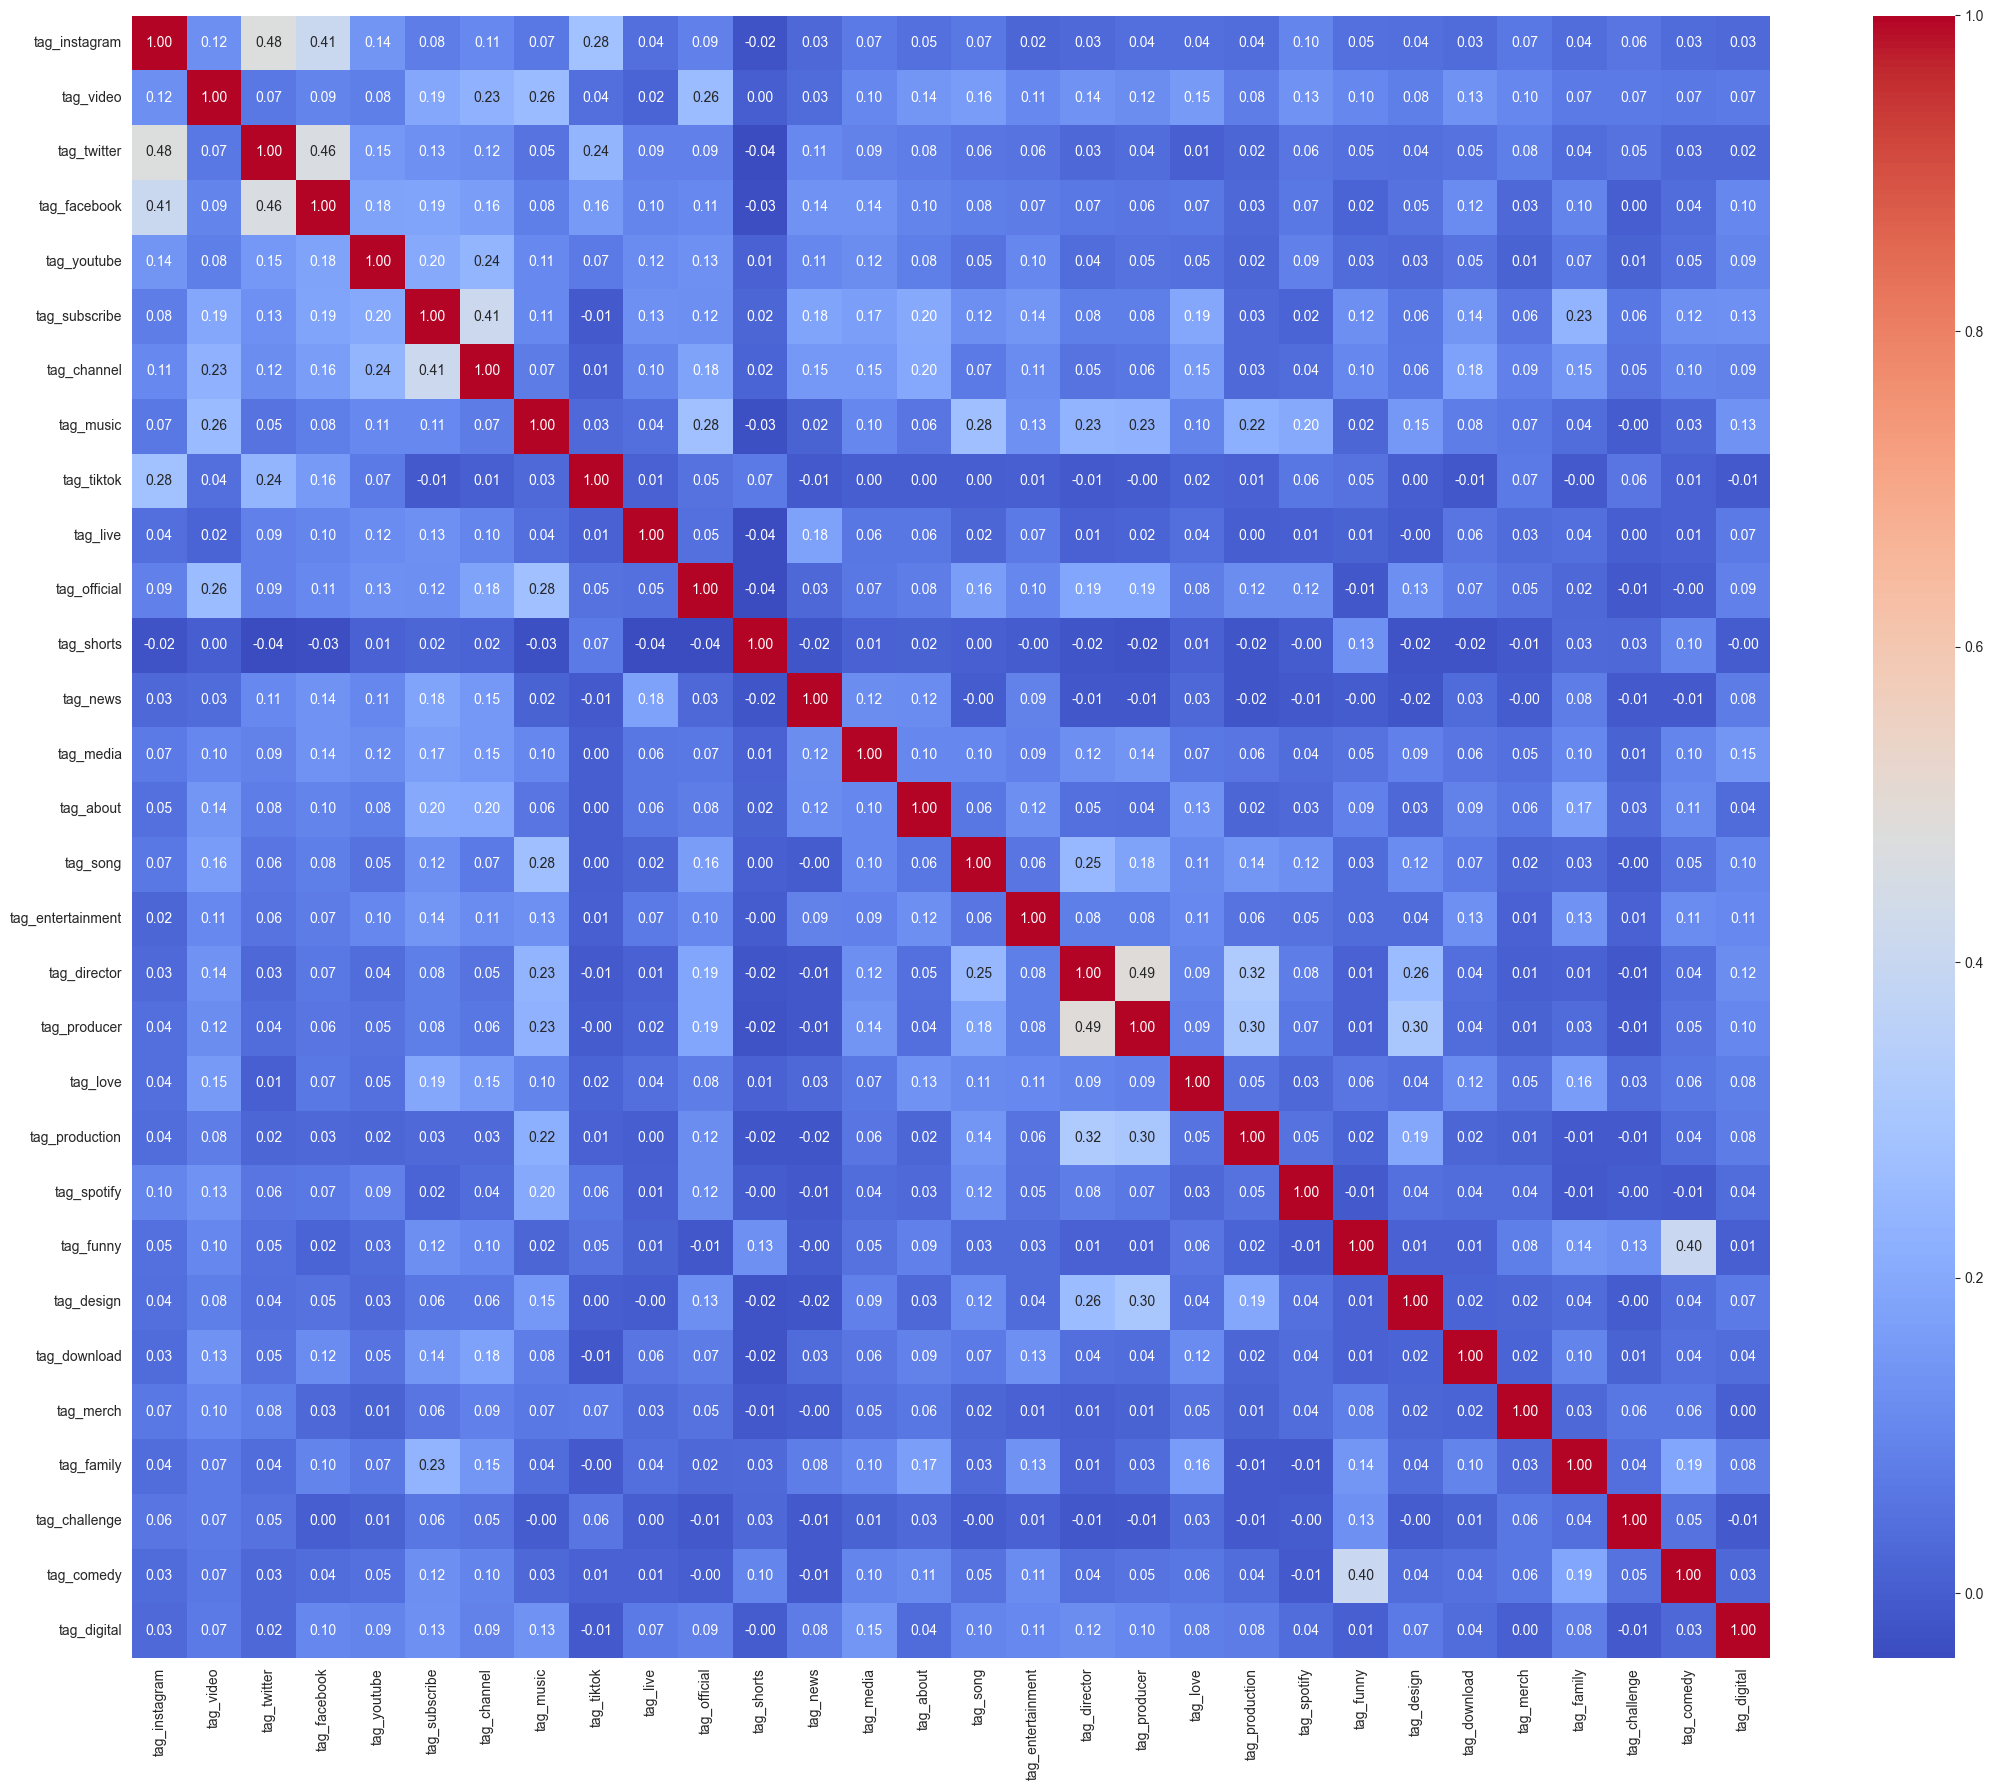

In [5]:
# correlation matrix of all the tags (index >= 11)
corr = complete_dataset.iloc[:, 11:].corr()
f, ax = plt.subplots(figsize=(22, 18))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

Director and producer tags are being used together most of the time similarly funny and comedy are used together most of the time, the same concept can be applied on all the 1.5 Million tags to exapand the number of tags which might help us to suggest tags to be used in a video while also improving the tags thereby improving the possible statistics

<h3 align='center'>Model Training</h3>

In [7]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
X = complete_dataset.drop(columns=['view_count'])
y = complete_dataset['view_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  2%|▏         | 1/42 [00:55<38:12, 55.91s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': -3.8799485832677414, 'Adjusted R-Squared': -3.8821074943259806, 'RMSE': 49654178.97541454, 'Time taken': 55.91008949279785}


  5%|▍         | 2/42 [02:00<40:43, 61.08s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.7952383333505249, 'Adjusted R-Squared': 0.7951477458742656, 'RMSE': 10171207.401500745, 'Time taken': 64.69460821151733}


  7%|▋         | 3/42 [02:03<22:20, 34.38s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.5977241632331542, 'Adjusted R-Squared': 0.5975461946054854, 'RMSE': 14256409.307563229, 'Time taken': 2.5981290340423584}


 10%|▉         | 4/42 [02:13<15:47, 24.94s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.5591390027821977, 'Adjusted R-Squared': 0.558943963907136, 'RMSE': 14924473.581040509, 'Time taken': 10.469221353530884}


 12%|█▏        | 5/42 [02:14<10:01, 16.26s/it]

{'Model': 'DummyRegressor', 'R-Squared': -2.441228101823789e-05, 'Adjusted R-Squared': -0.00046682754940552407, 'RMSE': 22477783.464552667, 'Time taken': 0.8854351043701172}


 14%|█▍        | 6/42 [02:16<06:49, 11.38s/it]

{'Model': 'ElasticNet', 'R-Squared': 0.5310833022695675, 'Adjusted R-Squared': 0.530875851427238, 'RMSE': 15392034.60698804, 'Time taken': 1.9009032249450684}


 17%|█▋        | 7/42 [02:21<05:20,  9.15s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 6.723861143875798e-05, 'Adjusted R-Squared': -0.00037513611018424875, 'RMSE': 22476753.411639262, 'Time taken': 4.557455539703369}


 19%|█▉        | 8/42 [02:27<04:47,  8.44s/it]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.5321640773376446, 'Adjusted R-Squared': 0.5319571046350344, 'RMSE': 15374286.333350783, 'Time taken': 6.9280290603637695}


 21%|██▏       | 9/42 [14:43<2:09:39, 235.75s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.805686714248872, 'Adjusted R-Squared': 0.8056007491830085, 'RMSE': 9908306.444351124, 'Time taken': 735.5594189167023}


 29%|██▊       | 12/42 [17:12<1:01:43, 123.45s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7488194714983167, 'Adjusted R-Squared': 0.7487083481101613, 'RMSE': 11265258.639457727, 'Time taken': 144.8746840953827}


 31%|███       | 13/42 [17:16<42:10, 87.27s/it]   

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6883801523934753, 'Adjusted R-Squared': 0.6882422903804878, 'RMSE': 12547602.082856921, 'Time taken': 4.022811412811279}


 33%|███▎      | 14/42 [17:31<30:35, 65.56s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5240342965799458, 'Adjusted R-Squared': 0.5238237272260022, 'RMSE': 15507293.697092678, 'Time taken': 15.389801979064941}


 36%|███▌      | 15/42 [18:30<28:37, 63.59s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6442694935205102, 'Adjusted R-Squared': 0.6441121167549384, 'RMSE': 13406293.948122375, 'Time taken': 59.03765082359314}


 40%|████      | 17/42 [18:33<13:11, 31.67s/it]

{'Model': 'Lars', 'R-Squared': 0.5977271887096196, 'Adjusted R-Squared': 0.5975492214204351, 'RMSE': 14256355.696945839, 'Time taken': 1.2636067867279053}


 43%|████▎     | 18/42 [18:38<09:27, 23.66s/it]

{'Model': 'LarsCV', 'R-Squared': 0.5972542965773073, 'Adjusted R-Squared': 0.5970761200785305, 'RMSE': 14264732.771049436, 'Time taken': 5.011849403381348}


 45%|████▌     | 19/42 [19:29<12:14, 31.93s/it]

{'Model': 'Lasso', 'R-Squared': 0.5977271902584844, 'Adjusted R-Squared': 0.5975492229699851, 'RMSE': 14256355.669500327, 'Time taken': 51.18016719818115}


 48%|████▊     | 20/42 [19:34<08:46, 23.94s/it]

{'Model': 'LassoCV', 'R-Squared': 0.5972295603769363, 'Adjusted R-Squared': 0.597051372934754, 'RMSE': 14265170.826461615, 'Time taken': 5.315910816192627}


 50%|█████     | 21/42 [19:35<05:59, 17.12s/it]

{'Model': 'LassoLars', 'R-Squared': 0.5977271907176377, 'Adjusted R-Squared': 0.5975492234293416, 'RMSE': 14256355.661364239, 'Time taken': 1.209200143814087}


 52%|█████▏    | 22/42 [19:40<04:24, 13.24s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5972542965773073, 'Adjusted R-Squared': 0.5970761200785305, 'RMSE': 14264732.771049436, 'Time taken': 4.190395832061768}


 55%|█████▍    | 23/42 [19:42<03:09,  9.98s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.5977280674040724, 'Adjusted R-Squared': 0.5975501005036262, 'RMSE': 14256340.126682132, 'Time taken': 2.3769891262054443}


 57%|█████▋    | 24/42 [19:44<02:16,  7.59s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.5977260705084028, 'Adjusted R-Squared': 0.5975481027245211, 'RMSE': 14256375.511189759, 'Time taken': 2.0235376358032227}


 60%|█████▉    | 25/42 [19:46<01:40,  5.90s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.035385337674426864, 'Adjusted R-Squared': -0.03584339677421089, 'RMSE': 22871739.054872524, 'Time taken': 1.9558532238006592}


 62%|██████▏   | 26/42 [30:34<52:59, 198.72s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.20054996882767318, 'Adjusted R-Squared': 0.2001962885617118, 'RMSE': 20097583.61064001, 'Time taken': 648.5656917095184}


 64%|██████▍   | 27/42 [6:50:16<29:03:29, 6973.98s/it]

{'Model': 'NuSVR', 'R-Squared': -0.020828703363548362, 'Adjusted R-Squared': -0.021280322543270058, 'RMSE': 22710391.377969775, 'Time taken': 22781.45381140709}


 67%|██████▋   | 28/42 [6:50:17<18:59:08, 4882.02s/it]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5883197963318176, 'Adjusted R-Squared': 0.5881376671702103, 'RMSE': 14422089.091958359, 'Time taken': 1.1047520637512207}


 69%|██████▉   | 29/42 [6:50:20<12:20:36, 3418.17s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5914608937117823, 'Adjusted R-Squared': 0.5912801541856912, 'RMSE': 14366963.86552616, 'Time taken': 2.6709113121032715}


 71%|███████▏  | 30/42 [6:52:22<8:05:51, 2429.29s/it] 

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5242855251062551, 'Adjusted R-Squared': 0.5240750668969343, 'RMSE': 15503200.556831487, 'Time taken': 121.9638741016388}


 74%|███████▍  | 31/42 [6:52:25<5:11:56, 1701.48s/it]

{'Model': 'PoissonRegressor', 'R-Squared': -0.12171513843035653, 'Adjusted R-Squared': -0.12221139021974126, 'RMSE': 23806166.829937942, 'Time taken': 3.2963321208953857}


 76%|███████▌  | 32/42 [7:59:10<6:38:44, 2392.49s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.029481623068700502, 'Adjusted R-Squared': -0.029937070338763583, 'RMSE': 22806439.09034185, 'Time taken': 4004.8120279312134}


 79%|███████▊  | 33/42 [7:59:15<4:11:26, 1676.23s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -3.2116745435076695, 'Adjusted R-Squared': -3.2135378071446796, 'RMSE': 46129164.01565261, 'Time taken': 4.991949558258057}


 81%|████████  | 34/42 [8:09:22<3:00:43, 1355.43s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8012347538091329, 'Adjusted R-Squared': 0.8011468191760782, 'RMSE': 10021169.49429664, 'Time taken': 606.882217168808}


 83%|████████▎ | 35/42 [8:09:23<1:50:43, 949.11s/it] 

{'Model': 'Ridge', 'R-Squared': 0.5977271186044741, 'Adjusted R-Squared': 0.5975491512842748, 'RMSE': 14256356.939192167, 'Time taken': 1.036536455154419}


 86%|████████▌ | 36/42 [8:09:25<1:06:31, 665.17s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.5977264868336665, 'Adjusted R-Squared': 0.5975485192339689, 'RMSE': 14256368.134014161, 'Time taken': 2.6441681385040283}


 88%|████████▊ | 37/42 [8:09:27<38:50, 466.14s/it]  

{'Model': 'SGDRegressor', 'R-Squared': 0.5685443243702701, 'Adjusted R-Squared': 0.5683534464515045, 'RMSE': 14764416.070239743, 'Time taken': 1.7431869506835938}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 360584, number of used features: 41
[LightGBM] [Info] Start training from score 5036127.288829


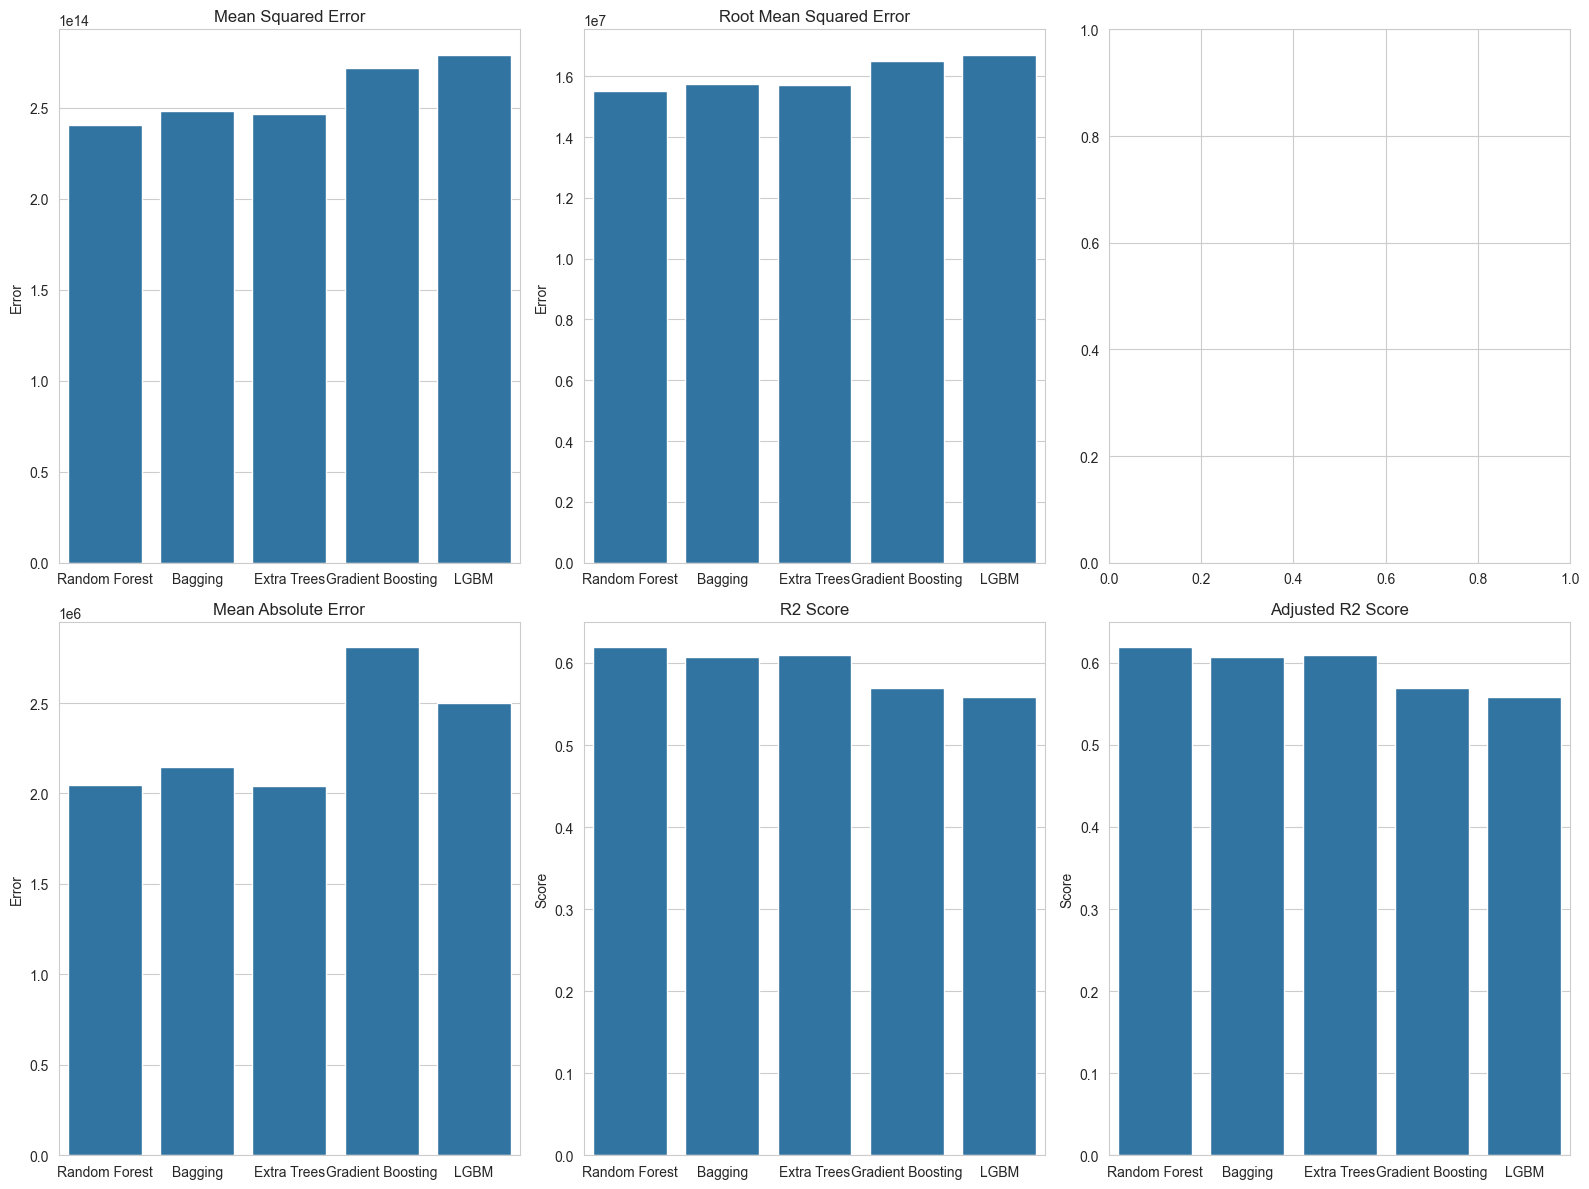

In [15]:
# import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, and LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

# import mean_squared_error, rmse, mae, r2_score and adjusted_r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# create a dictionary of regressors
regressors = {
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Bagging": BaggingRegressor(n_jobs=-1),
    "Extra Trees": ExtraTreesRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LGBM": LGBMRegressor()
}

# create an empty dictionary to store the results
results = {}



# loop through each regressor
for name, regressor in regressors.items():
    # fit the model
    regressor.fit(X_train, y_train)
    # make predictions
    y_pred = regressor.predict(X_test)
    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    # calculate the root mean squared error
    rmse = sqrt(mse)
    # calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    # calculate the r-squared score
    r2 = r2_score(y_test, y_pred)
    # calculate the adjusted r-squared score
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    # store the results in the dictionary
    results[name] = {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Mean Absolute Error": mae,
        "R2 Score": r2,
        "Adjusted R2 Score": adjusted_r2
    }

# plot all the types of errors in different graphs
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

# plot the mean squared error
sns.barplot(x=list(results.keys()), y=[result["Mean Squared Error"] for result in results.values()], ax=axes[0, 0])
axes[0, 0].set_title("Mean Squared Error")
axes[0, 0].set_ylabel("Error")

# plot the root mean squared error
sns.barplot(x=list(results.keys()), y=[result["Root Mean Squared Error"] for result in results.values()], ax=axes[0, 1])
axes[0, 1].set_title("Root Mean Squared Error")
axes[0, 1].set_ylabel("Error")

# plot the mean absolute error
sns.barplot(x=list(results.keys()), y=[result["Mean Absolute Error"] for result in results.values()], ax=axes[1, 0])
axes[1, 0].set_title("Mean Absolute Error")
axes[1, 0].set_ylabel("Error")

# plot the r-squared score
sns.barplot(x=list(results.keys()), y=[result["R2 Score"] for result in results.values()], ax=axes[1, 1])
axes[1, 1].set_title("R2 Score")
axes[1, 1].set_ylabel("Score")

# plot the adjusted r-squared score
sns.barplot(x=list(results.keys()), y=[result["Adjusted R2 Score"] for result in results.values()], ax=axes[1, 2])
axes[1, 2].set_title("Adjusted R2 Score")
axes[1, 2].set_ylabel("Score")

plt.tight_layout()
plt.show()

In [14]:
results

,Random Forest,Bagging,Extra Trees,Gradient Boosting,LGBM
Mean Squared Error,242116612616950.22,248723848829582.81,243105558931723.97,271843878043008.66,278993195690813.34
Root Mean Squared Error,15560096.81,15770981.23,15591842.70,16487688.68,16703089.41
Mean Absolute Error,2052012.09,2158945.91,2036626.19,2808152.98,2497996.83
R2 Score,0.62,0.61,0.61,0.57,0.56
Adjusted R2 Score,0.62,0.61,0.61,0.57,0.56
